In [6]:
from __future__ import division, print_function
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [17]:
reviews_train = load_files('C:/Users/khvorostynaa/Downloads/aclImdb/train')

In [18]:
text_train, y_train = reviews_train.data, reviews_train.target

In [19]:
len(text_train)

25000

In [20]:
reviews_test = load_files("C:/Users/khvorostynaa/Downloads/aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


In [21]:
cv = CountVectorizer()
cv.fit(text_train)
print(len(cv.vocabulary_))

74849


In [24]:
print(cv.get_feature_names()[49990:50005])

['pimps', 'pimpy', 'pin', 'pina', 'pinacle', 'pinata', 'pinball', 'pincers', 'pinch', 'pinched', 'pincher', 'pinchers', 'pinches', 'pinching', 'pinchot']


In [26]:
X_train = cv.transform(text_train)
X_test = cv.transform(text_test)

In [27]:
%%time
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)
print(round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3))

C:\Users\khvorostynaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.998 0.867
Wall time: 12.7 s


In [28]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
    color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
    color='red', label='test')
    plt.legend();

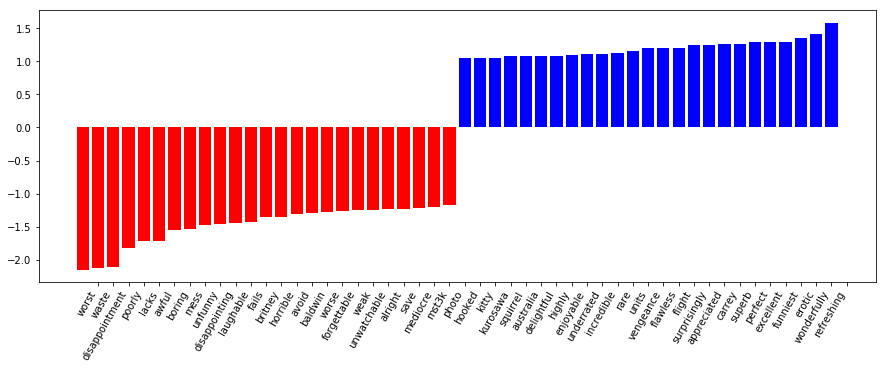

In [29]:
visualize_coefficients(logit, cv.get_feature_names())

In [35]:
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(),
                               LogisticRegression(n_jobs=-1, random_state=7))
text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test,y_test))

C:\Users\khvorostynaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.86672


C:\Users\khvorostynaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Users\khvorostynaa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.87907999999999997

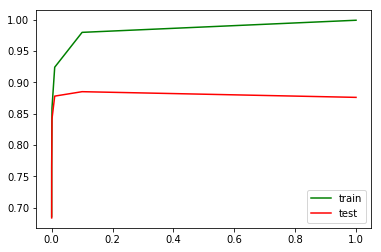

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5,0,6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)
grid_logit.best_params_, grid_logit.best_score_
plot_grid_scores(grid_logit, 'logisticregression__C')
grid_logit.score(text_test, y_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)
forest.fit(X_train, y_train)
print(round(forest.score(X_test, y_test), 3))

0.855
